### Student Information
Name:唐孟婕

Student ID:112062539

GitHub ID: jessie1130

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## First Section

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
import pandas as pd

# my functions
from DM2023_Lab1_Master.helpers import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X.query('category_name == "sci.med"')

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer
Because those data are not null, their datatypes are string. Therefore, they have value.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### Answer
X_sample is formed by random choosing records in X, and it is not in order.
Also, if fixing the number of random_state, it would always display the same dataframe.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

### Answer
First, the number of X_sample is definitely less than X.
Second, according to this chart, we can still observe that their distributions are quite similar. The first category is slicely more than the second one, and the second category is more than the third one, and the third one is more than the fourth one. Both X and X_sample have this same distribution.
In conclution, in this case, we can use sampling to find out the distribution of categories.

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

from scipy.sparse import csr_matrix, find

#use sparse matrix to quickly find all nonzero terms
A = csr_matrix(X_counts[4:5, 0:100].toarray())
a = find(A)
index = a[1][1]
count_vect.get_feature_names_out()[index:index+1]

array(['01'], dtype=object)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [9]:
#use sparse matrix to find the count of every term in every documents
from collections import Counter 

#X_counts.nonzero()
A = csr_matrix(X_counts[0:20].toarray())
a = find(A)
term = list(a[1])

#use counter to find the 20 terms appear in this 20 documents the most (計算前20個最常出現在20筆紀錄中的terms，例如一個詞在18筆紀錄中出現，數值為18)
counters = Counter(term)
most = counters.most_common(20)


In [10]:
# the 20 most terms
plot_x = []
x = []
for i in most:
    plot_x.append(count_vect.get_feature_names_out()[i[0]])
    x.append(i[0])
print(plot_x)

['from', 'in', 'lines', 'organization', 'subject', 'of', 'the', 'to', 'is', 'and', 'it', 'this', 'be', 'for', 'at', 'edu', 'on', 'or', 're', 'so']


In [11]:
# 20 documents
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [12]:
#find the counts of these terms
plot_z = []
for i in range(20):
    temp = []
    for j in x:
        temp.append(X_counts[i, j])
    plot_z.append(temp)

print(plot_z)

[[1, 1, 1, 1, 1, 1, 5, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 1, 1, 1, 8, 11, 4, 10, 0, 2, 3, 4, 2, 0, 1, 0, 1, 0, 0], [2, 6, 1, 1, 1, 10, 14, 26, 4, 9, 8, 14, 8, 6, 7, 2, 1, 4, 1, 3], [1, 3, 1, 1, 1, 2, 6, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0], [1, 3, 1, 1, 1, 3, 10, 8, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1], [1, 4, 1, 1, 1, 6, 12, 14, 7, 7, 1, 2, 12, 0, 1, 2, 1, 1, 1, 1], [2, 4, 1, 1, 1, 7, 3, 8, 4, 7, 3, 0, 3, 5, 1, 2, 3, 4, 4, 3], [4, 3, 1, 1, 1, 11, 21, 11, 9, 9, 10, 2, 5, 1, 2, 0, 8, 3, 1, 1], [1, 3, 1, 1, 1, 4, 6, 6, 5, 5, 2, 1, 0, 0, 0, 6, 0, 0, 2, 0], [1, 4, 1, 1, 1, 6, 10, 21, 1, 23, 2, 7, 1, 3, 2, 2, 6, 1, 0, 2], [1, 18, 1, 2, 1, 22, 31, 25, 9, 15, 8, 6, 4, 7, 2, 3, 2, 4, 2, 3], [1, 2, 1, 1, 1, 3, 2, 2, 5, 2, 1, 1, 0, 2, 1, 3, 2, 1, 0, 0], [6, 11, 1, 1, 1, 22, 35, 16, 26, 13, 16, 3, 7, 5, 2, 0, 1, 9, 1, 2], [1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1], [2, 2, 1, 1, 1, 3, 5, 1, 0, 4, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0], [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 

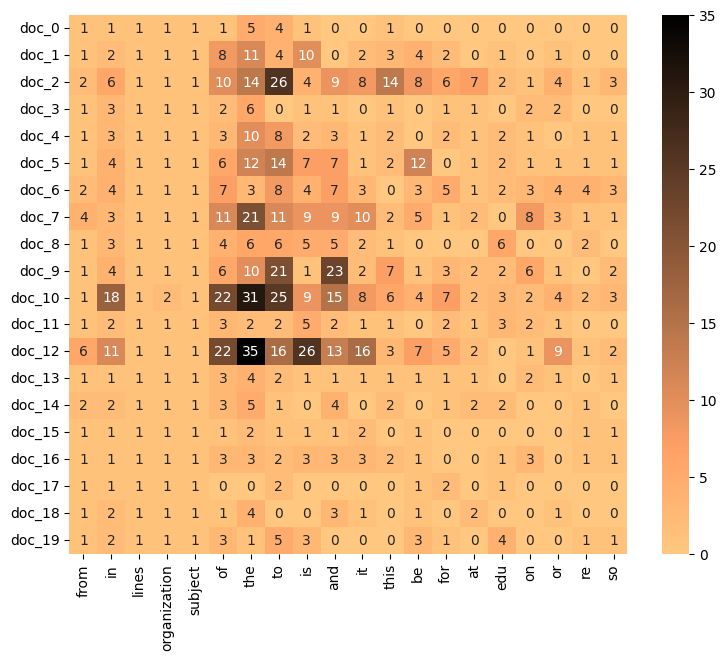

In [13]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="copper_r",
                 vmin=0, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [14]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

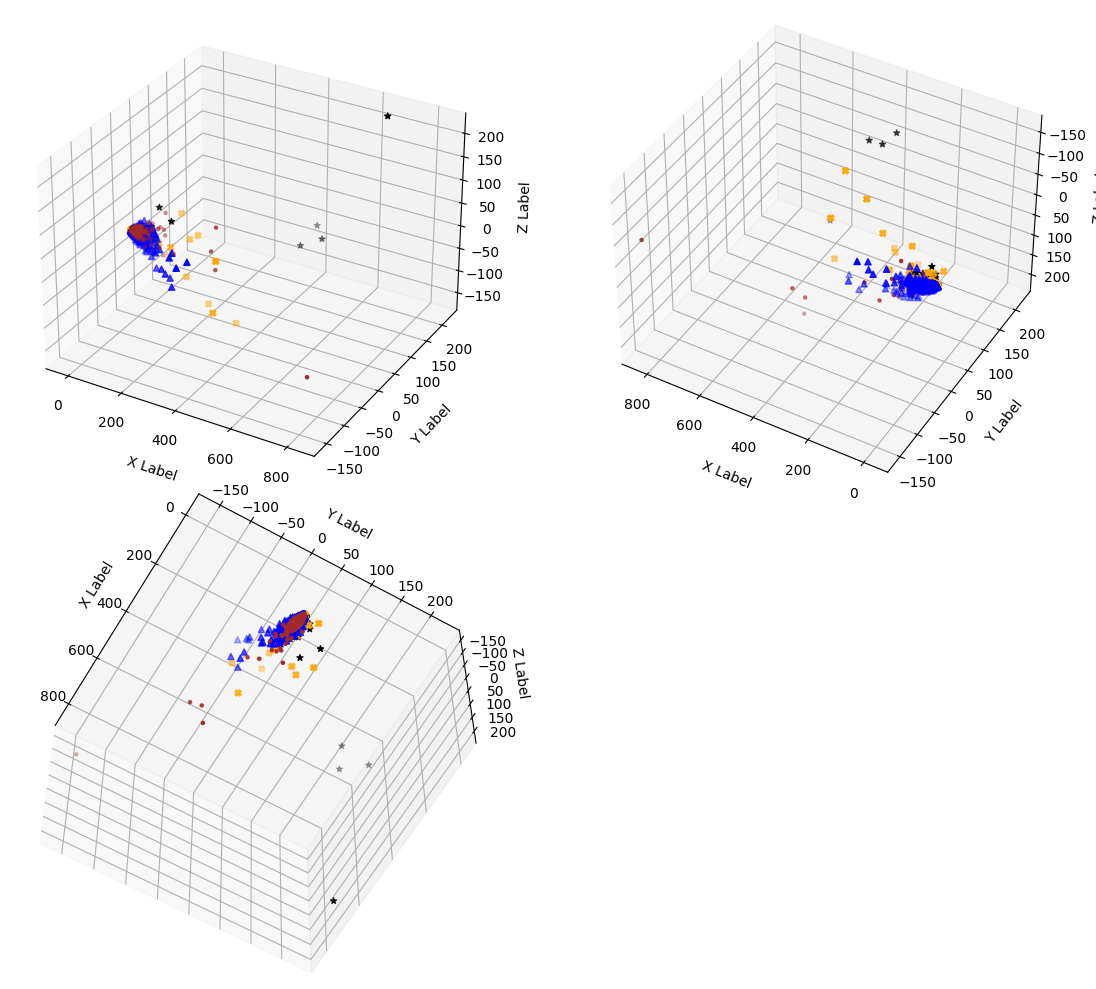

In [15]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['brown', 'blue', 'black', 'orange']
mark = ['.', "^", "*", "X"]

#use subplot to display mutiple plot in one figure
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(2,2,1,projection='3d')
bx = plt.subplot(2,2,2,projection='3d')
cx = plt.subplot(2,2,3,projection='3d')

for c, category, m in zip(col, categories, mark):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker=m)
    bx.scatter(xs, ys, zs, c = c, marker=m)
    cx.scatter(xs, ys, zs, c = c, marker=m)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

bx.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
bx.set_xlabel('\nX Label')
bx.set_ylabel('\nY Label')
bx.set_zlabel('\nZ Label')
bx.view_init(-140, 60)

cx.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
cx.set_xlabel('\nX Label')
cx.set_ylabel('\nY Label')
cx.set_zlabel('\nZ Label')
cx.view_init(120, 30) 

plt.tight_layout()
#plt.subplots_adjust(hspace=1, wspace=0.5, left=1, right=1, bottom=1, top=1)
plt.show()

### Answer
1. 'alt.atheism' and 'soc.religion.christian' are more clustering than other 2 categories.
2. Overall, 'alt.atheism''s Z are higher than 'soc.religion.christian'
3. 'comp.graphics' and 'sci.med' are more seperated, but 'comp.graphics' is more scattered.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [16]:
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(int(sum(X_counts[:,j].toarray())))


In [17]:
import plotly.express as px

df = pd.DataFrame(term_frequencies[:300], index = count_vect.get_feature_names_out()[:300], columns = ["frequency"])
fig = px.bar(df, y="frequency", x=count_vect.get_feature_names_out()[:300], text_auto='.2s',
            title="Frequencies of terms")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [18]:
#fine the 20 most appeared terms
term_frequencies_20 = sorted(term_frequencies, reverse=True)[:20]
print(term_frequencies_20)

#find the 20 terms' index in order to find their terms name
term_frequencies_20_index = []
for t in term_frequencies_20:
    term_frequencies_20_index.append(term_frequencies.index(t))
    
print(term_frequencies_20_index)

term_frequencies_name = []
for i in term_frequencies_20_index:
    term_frequencies_name.append(count_vect.get_feature_names_out()[i])
    
print(term_frequencies_name)

[29825, 17660, 17222, 13017, 12343, 11226, 10723, 8447, 6157, 5962, 5285, 5063, 4898, 4877, 4769, 4675, 4218, 4015, 3709, 3655]
[32142, 23610, 32493, 4992, 18474, 17556, 32139, 18551, 35638, 14601, 23250, 32270, 6298, 14887, 5410, 12626, 16254, 5549, 23733, 35157]
['the', 'of', 'to', 'and', 'is', 'in', 'that', 'it', 'you', 'for', 'not', 'this', 'be', 'from', 'are', 'edu', 'have', 'as', 'on', 'with']


In [19]:
df_14 = pd.DataFrame(term_frequencies_20, index = term_frequencies_name, columns = ["frequency"])
fig = px.bar(df_14, y="frequency", x=term_frequencies_name, text_auto='.2s',
            title="Frequencies of the 20 most terms")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [20]:
#find the first 300 terms and sort them

term_frequencies_300 = term_frequencies[:300]
term_name_300 = count_vect.get_feature_names_out()[:300]

term_frequencies_300, term_name_300 = zip(*sorted(zip(term_frequencies_300, term_name_300), reverse=True))
    

[Text(0.0, 0, '10'),
 Text(1.0, 0, '00'),
 Text(2.0, 0, '100'),
 Text(3.0, 0, '03'),
 Text(4.0, 0, '01'),
 Text(5.0, 0, '000'),
 Text(6.0, 0, '05'),
 Text(7.0, 0, '02'),
 Text(8.0, 0, '04'),
 Text(9.0, 0, '08'),
 Text(10.0, 0, '09'),
 Text(11.0, 0, '07'),
 Text(12.0, 0, '0358'),
 Text(13.0, 0, '1000'),
 Text(14.0, 0, '101'),
 Text(15.0, 0, '06'),
 Text(16.0, 0, '00pm'),
 Text(17.0, 0, '1013'),
 Text(18.0, 0, '1024x768'),
 Text(19.0, 0, '102'),
 Text(20.0, 0, '071'),
 Text(21.0, 0, '1024'),
 Text(22.0, 0, '084042'),
 Text(23.0, 0, '081052'),
 Text(24.0, 0, '0511'),
 Text(25.0, 0, '0349'),
 Text(26.0, 0, '00am'),
 Text(27.0, 0, '103'),
 Text(28.0, 0, '101010'),
 Text(29.0, 0, '095220'),
 Text(30.0, 0, '0423'),
 Text(31.0, 0, '040'),
 Text(32.0, 0, '0200'),
 Text(33.0, 0, '01580'),
 Text(34.0, 0, '0100'),
 Text(35.0, 0, '103237'),
 Text(36.0, 0, '102007'),
 Text(37.0, 0, '10101'),
 Text(38.0, 0, '0x100'),
 Text(39.0, 0, '06320'),
 Text(40.0, 0, '0608'),
 Text(41.0, 0, '0600'),
 Text(42.0,

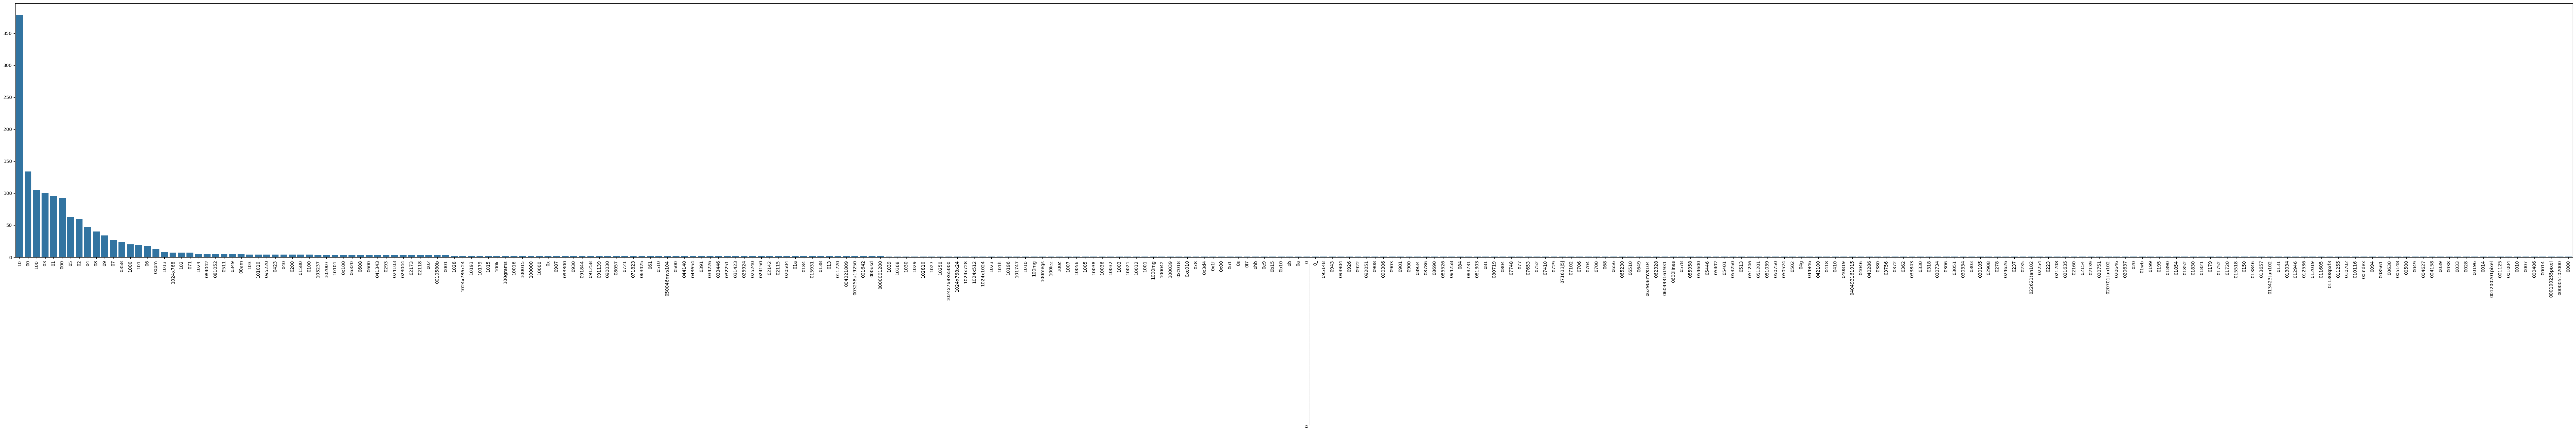

In [21]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term_name_300,y=term_frequencies_300)
g.set_xticks(term_name_300)
g.set_xticklabels(term_name_300, rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer
Yes!

In [22]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## Second Section 

In [23]:
import pandas as pd
from DM2023_Lab1_Master.helpers import data_mining_helpers as dmh

#combine three comment files
filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
with open('all_comment.txt', 'w', encoding="utf-8") as outfile:
    for fname in filenames:
        with open('sentiment labelled sentences/'+fname, encoding="utf-8") as infile:
            for line in infile:
                line = line.split('\n')[0]
                line += '\t' + fname + '\n'
                outfile.write(line)

#convert dataset into dataframe
header = ['sentences']
comment = pd.read_csv('all_comment.txt',names=header, sep='/n', engine='python')

#create category
comment['score'] = comment.sentences.apply(lambda t: t.split('\t')[1])
comment['source'] = comment.sentences.apply(lambda t: t.split('\t')[2])
comment['sentences'] = comment.sentences.apply(lambda t: t.split('\t')[0])
comment['website'] = comment.source.apply(lambda t: t[:-13])
display(comment)

,sentences,score,source,website
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,amazon_cells
2,Great for the jawbone.,1,amazon_cells_labelled.txt,amazon_cells
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,amazon_cells
4,The mic is great.,1,amazon_cells_labelled.txt,amazon_cells
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt,yelp
2996,Appetite instantly gone.,0,yelp_labelled.txt,yelp
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt,yelp


### Missing Value

In [24]:
# check missing values
comment.isnull()

,sentences,score,source,website
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [25]:
comment.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentences,score,source,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


### Duplicated Recode

In [26]:
#check duplicated records
comment.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [27]:
sum(comment.duplicated())
comment[comment.duplicated(keep=False)]

,sentences,score,source,website
18,Works great!.,1,amazon_cells_labelled.txt,amazon_cells
179,If you like a loud buzzing to override all you...,0,amazon_cells_labelled.txt,amazon_cells
180,Don't buy this product.,0,amazon_cells_labelled.txt,amazon_cells
187,Great phone!.,1,amazon_cells_labelled.txt,amazon_cells
262,Works great.,1,amazon_cells_labelled.txt,amazon_cells
285,Great phone!.,1,amazon_cells_labelled.txt,amazon_cells
290,Great Phone.,1,amazon_cells_labelled.txt,amazon_cells
392,This is a great deal.,1,amazon_cells_labelled.txt,amazon_cells
402,Excellent product for the price.,1,amazon_cells_labelled.txt,amazon_cells
407,Works great.,1,amazon_cells_labelled.txt,amazon_cells


In [28]:
#drop the same comment, only leave one record
comment.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe
len(comment)

2983

In [29]:
print(comment.shape)
comment_sample = comment.sample(n=1000,random_state=30) #random state
display(comment_sample)

(2983, 4)


,sentences,score,source,website
2122,Service was fine and the waitress was friendly.,1,yelp_labelled.txt,yelp
668,Much less than the jawbone I was going to repl...,1,amazon_cells_labelled.txt,amazon_cells
196,You'll love how thin it is.,1,amazon_cells_labelled.txt,amazon_cells
542,"Perhaps my phone is defective, but people cann...",0,amazon_cells_labelled.txt,amazon_cells
310,"This is a good battery, and it got here really...",1,amazon_cells_labelled.txt,amazon_cells
...,...,...,...,...
2658,It was just not a fun experience.,1,yelp_labelled.txt,yelp
1222,Mishima is extremely uninteresting.,0,imdb_labelled.txt,imdb
1215,Hitchcock is a great director.,1,imdb_labelled.txt,imdb
1500,The entire audience applauded at the conclusio...,1,imdb_labelled.txt,imdb


### Sampling

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
websites = ['amazon_cells', 'yelp', 'imdb']

website
imdb            997
yelp            996
amazon_cells    990
Name: count, dtype: int64


<Axes: title={'center': 'website distribution'}, xlabel='website'>

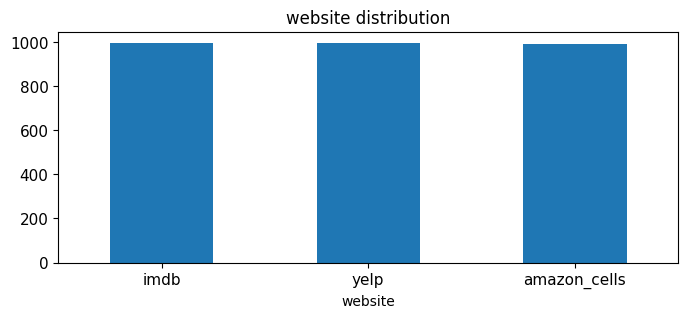

In [32]:
print(comment.website.value_counts())

# plot barchart for comment
comment.website.value_counts().plot(kind = 'bar',
                                    title = 'website distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

website
imdb            349
yelp            338
amazon_cells    313
Name: count, dtype: int64


<Axes: title={'center': 'website distribution'}, xlabel='website'>

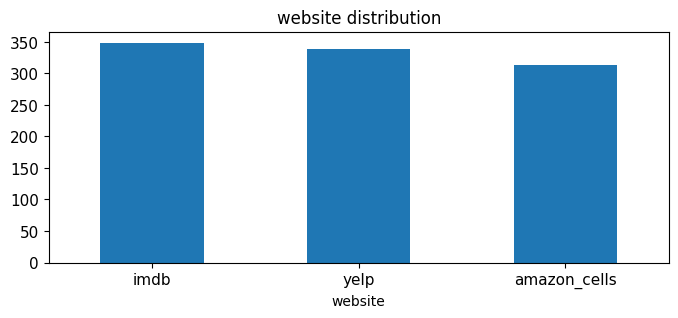

In [33]:
print(comment_sample.website.value_counts())

# plot barchart for comment
comment_sample.website.value_counts().plot(kind = 'bar',
                                    title = 'website distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

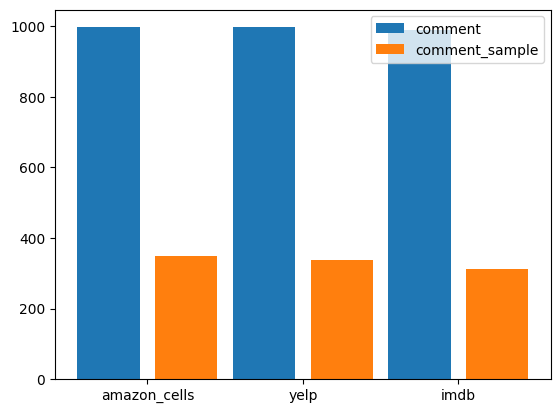

In [34]:
x = np.arange(len(websites))*2

plt.bar(x=x-0.5, height=comment.website.value_counts(), label="comment")
plt.bar(x=x+0.5, height=comment_sample.website.value_counts(), label="comment_sample")

plt.xticks(x, websites)
plt.legend()

plt.show()

### Feature Creation

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
comment['unigrams'] = comment['sentences'].apply(lambda x: dmh.tokenize_text(x))
display(comment)

,sentences,score,source,website,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,amazon_cells,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled.txt,amazon_cells,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,amazon_cells,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon_cells_labelled.txt,amazon_cells,"[The, mic, is, great, .]"
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt,yelp,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,yelp_labelled.txt,yelp,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt,yelp,"[The, whole, experience, was, underwhelming, ,..."


In [37]:
list(comment[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
comment_counts = count_vect.fit_transform(comment.sentences) #learn the vocabulary and return document-term matrix
print(comment_counts.shape)
print(comment_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [39]:
count_vect.get_feature_names_out()[4161]

'so'

In [40]:
analyze = count_vect.build_analyzer()
analyze(comment.sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [41]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [42]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [43]:
# obtain document index
plot_y = ["sentence_"+ str(i) for i in list(comment.index)[0:20]]
print(plot_y)

['sentence_0', 'sentence_1', 'sentence_2', 'sentence_3', 'sentence_4', 'sentence_5', 'sentence_6', 'sentence_7', 'sentence_8', 'sentence_9', 'sentence_10', 'sentence_11', 'sentence_12', 'sentence_13', 'sentence_14', 'sentence_15', 'sentence_16', 'sentence_17', 'sentence_18', 'sentence_19']


In [44]:
plot_z = comment_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


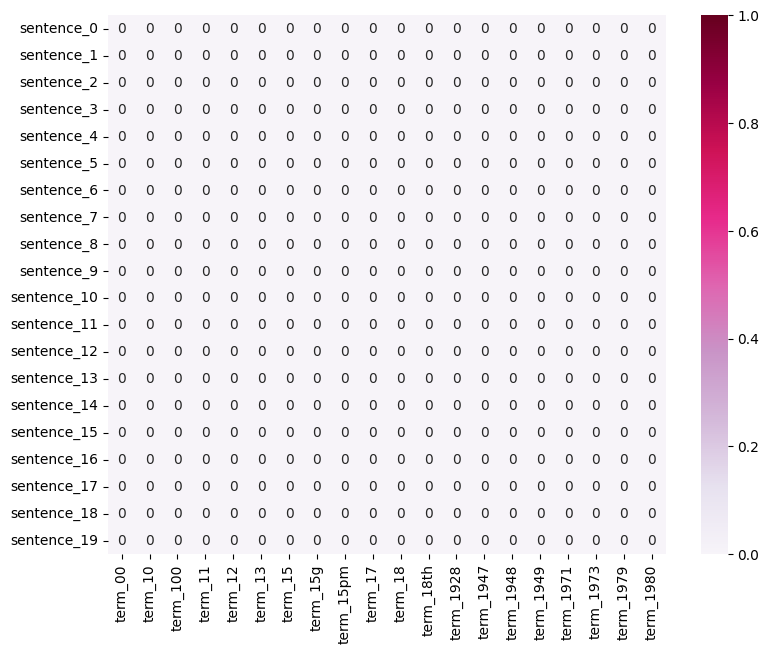

In [45]:
import seaborn as sns

df_comment= pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_comment,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [46]:
#use sparse matrix to find the count of every term in every documents
from collections import Counter 
from scipy.sparse import csr_matrix, find

#X_counts.nonzero()
A = csr_matrix(comment_counts.toarray())
a = find(A)
term = list(a[1])

#use counter to find the 20 terms appear in all comments the most (計算前20個最常出現在所有comments中的terms)
counters = Counter(term)
most = counters.most_common(20)

In [47]:
# the 20 most terms
plot_x = []
x = []
for i in most:
    plot_x.append(count_vect.get_feature_names_out()[i[0]])
    x.append(i[0])
print(plot_x)

['the', 'and', 'it', 'is', 'this', 'to', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'very', 'my', 'good', 'on', 'but', 'great', 'have']


In [48]:
#find the counts of these terms
plot_z = []
for i in range(20):
    temp = []
    for j in x:
        temp.append(comment_counts[i, j])
    plot_z.append(temp)

print(plot_z)

[[1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 

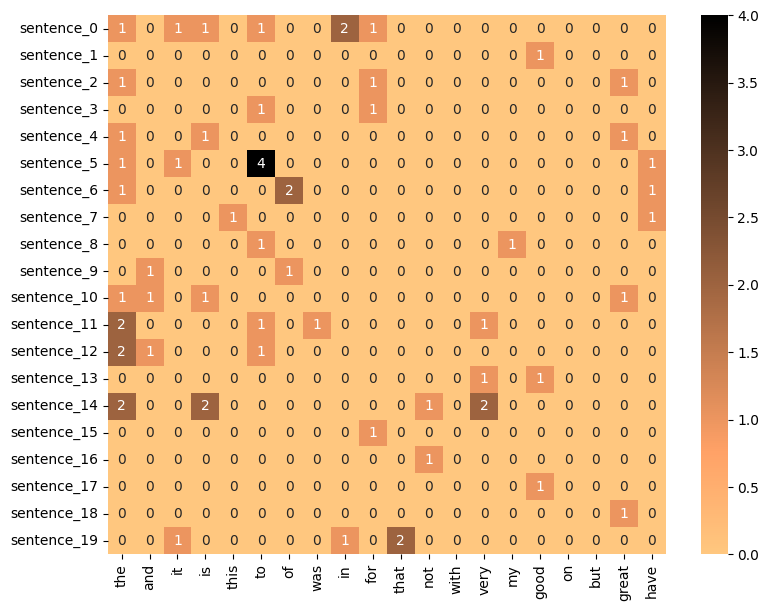

In [49]:
df_comment= pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_comment,
                 cmap="copper_r",
                 vmin=0, annot=True)

### Dimensionality Reduction

In [50]:
from sklearn.decomposition import PCA

In [51]:
print(comment.shape)
comment_reduced = PCA(n_components = 2).fit_transform(comment_counts.toarray())
print(comment_reduced.shape)

(2983, 5)
(2983, 2)


In [52]:
websites

['amazon_cells', 'yelp', 'imdb']

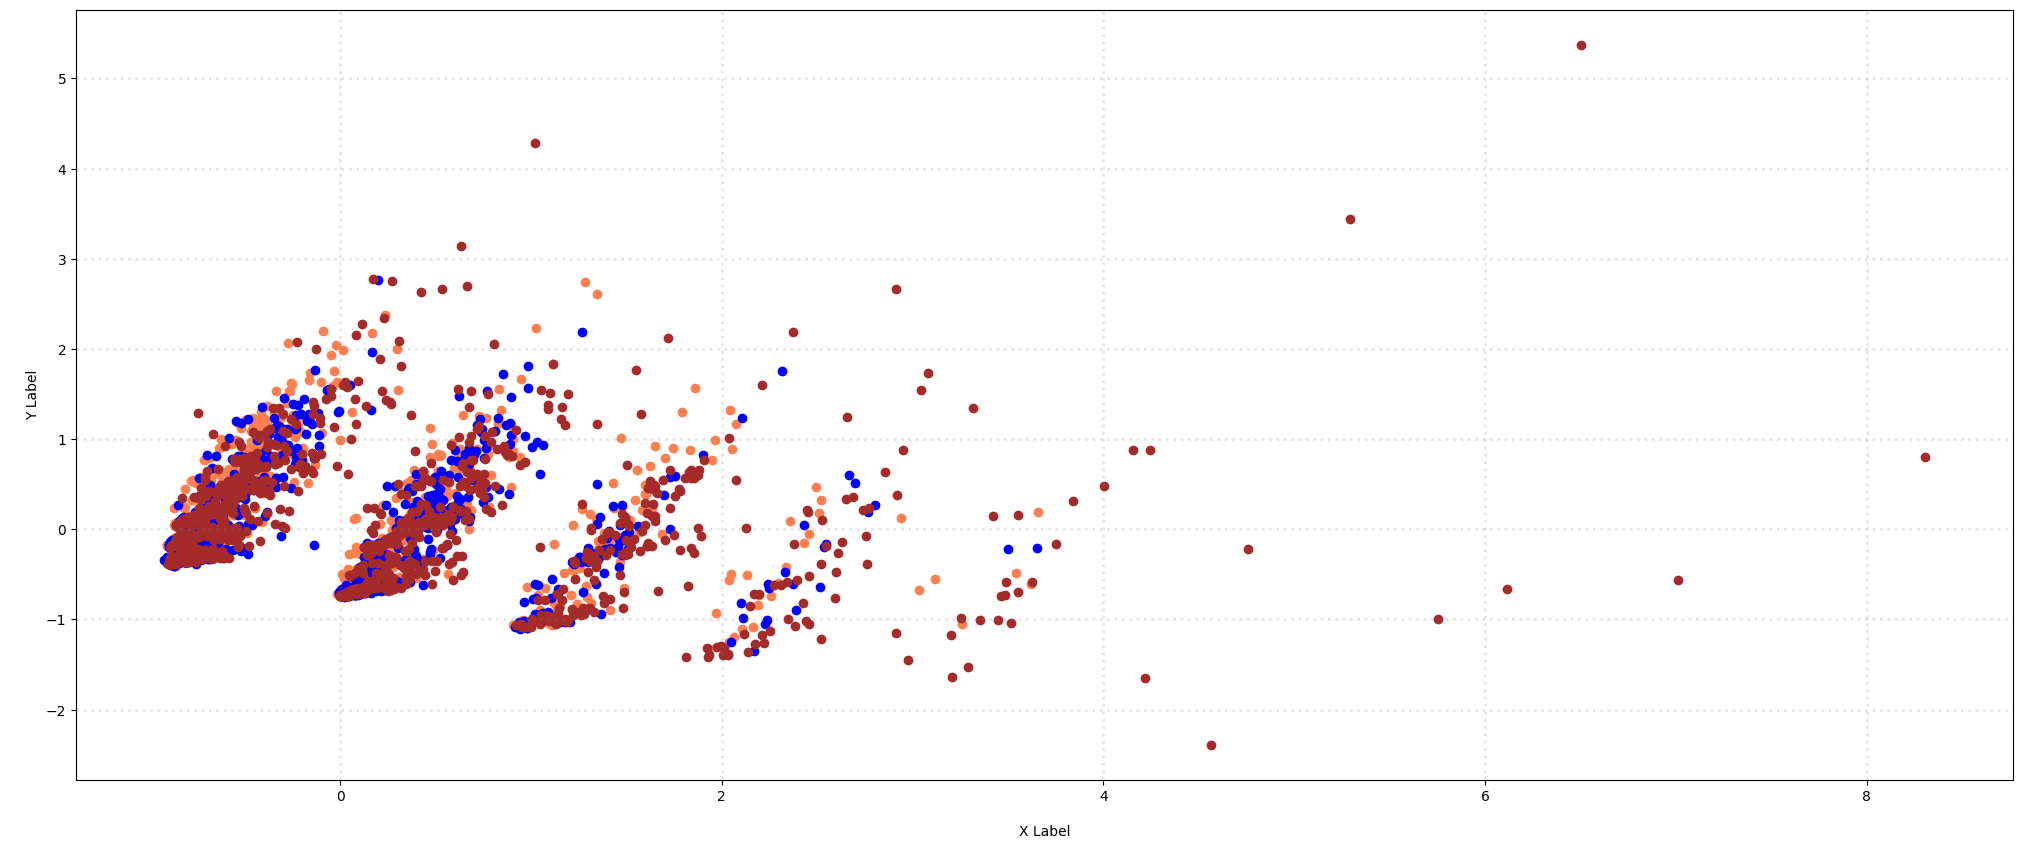

In [53]:
col = ['coral', 'blue', 'brown', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, website in zip(col, websites):
    xs = comment_reduced[comment['website'] == website].T[0]
    ys = comment_reduced[comment['website'] == website].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

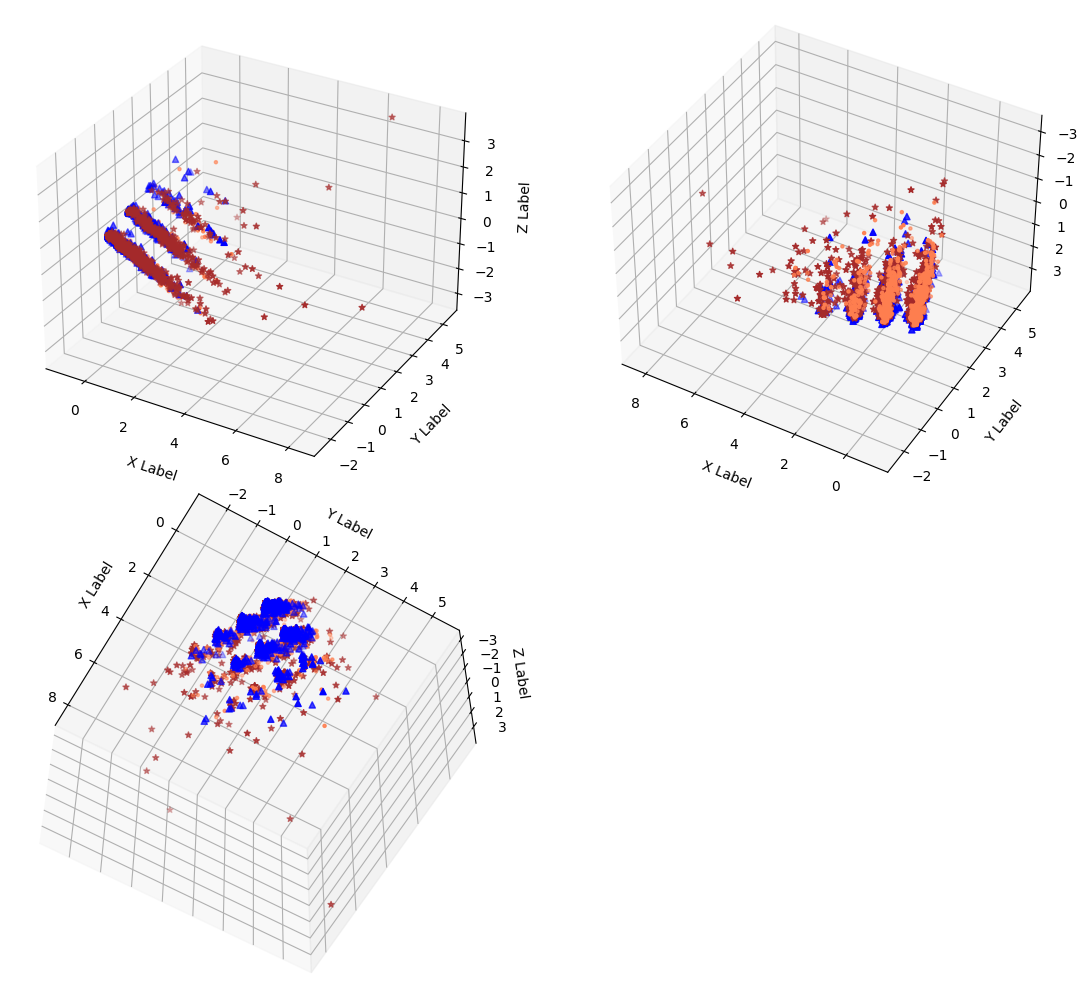

In [54]:
#contruct 3d plot
from sklearn.decomposition import PCA

comment_reduced = PCA(n_components = 3).fit_transform(comment_counts.toarray())

col = ['coral', 'blue', 'brown', 'orange']
mark = ['.', "^", "*", "X"]

#use subplot to display mutiple plot in one figure
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(2,2,1,projection='3d')
bx = plt.subplot(2,2,2,projection='3d')
cx = plt.subplot(2,2,3,projection='3d')

for c, website, m in zip(col, websites, mark):
    xs = comment_reduced[comment['website'] == website].T[0]
    ys = comment_reduced[comment['website'] == website].T[1]
    zs = comment_reduced[comment['website'] == website].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker=m)
    bx.scatter(xs, ys, zs, c = c, marker=m)
    cx.scatter(xs, ys, zs, c = c, marker=m)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

bx.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
bx.set_xlabel('\nX Label')
bx.set_ylabel('\nY Label')
bx.set_zlabel('\nZ Label')
bx.view_init(-140, 60)

cx.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
cx.set_xlabel('\nX Label')
cx.set_ylabel('\nY Label')
cx.set_zlabel('\nZ Label')
cx.view_init(120, 30) 

plt.tight_layout()
#plt.subplots_adjust(hspace=1, wspace=0.5, left=1, right=1, bottom=1, top=1)
plt.show()

### Attribute Transformation / Aggregation

In [55]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

[Text(0.0, 0, '00'),
 Text(1.0, 0, '10'),
 Text(2.0, 0, '100'),
 Text(3.0, 0, '11'),
 Text(4.0, 0, '12'),
 Text(5.0, 0, '13'),
 Text(6.0, 0, '15'),
 Text(7.0, 0, '15g'),
 Text(8.0, 0, '15pm'),
 Text(9.0, 0, '17'),
 Text(10.0, 0, '18'),
 Text(11.0, 0, '18th'),
 Text(12.0, 0, '1928'),
 Text(13.0, 0, '1947'),
 Text(14.0, 0, '1948'),
 Text(15.0, 0, '1949'),
 Text(16.0, 0, '1971'),
 Text(17.0, 0, '1973'),
 Text(18.0, 0, '1979'),
 Text(19.0, 0, '1980'),
 Text(20.0, 0, '1986'),
 Text(21.0, 0, '1995'),
 Text(22.0, 0, '1998'),
 Text(23.0, 0, '20'),
 Text(24.0, 0, '2000'),
 Text(25.0, 0, '2005'),
 Text(26.0, 0, '2006'),
 Text(27.0, 0, '2007'),
 Text(28.0, 0, '20th'),
 Text(29.0, 0, '2160'),
 Text(30.0, 0, '23'),
 Text(31.0, 0, '24'),
 Text(32.0, 0, '25'),
 Text(33.0, 0, '2mp'),
 Text(34.0, 0, '30'),
 Text(35.0, 0, '30s'),
 Text(36.0, 0, '325'),
 Text(37.0, 0, '35'),
 Text(38.0, 0, '350'),
 Text(39.0, 0, '375'),
 Text(40.0, 0, '3o'),
 Text(41.0, 0, '40'),
 Text(42.0, 0, '40min'),
 Text(43.0, 0, '

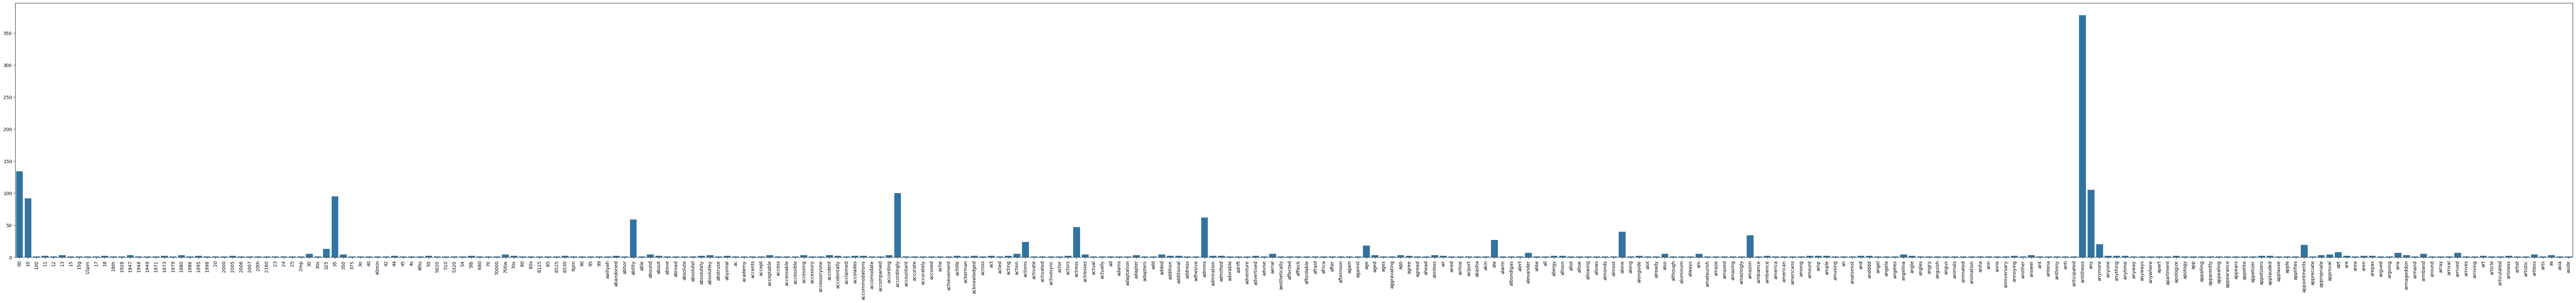

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticks(count_vect.get_feature_names_out()[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [57]:
# count terms' frequencies
term_frequencies = []
print(comment_counts.shape[1])
for j in range(0,comment_counts.shape[1]):
    term_frequencies.append(int(sum(comment_counts[:,j].toarray())))


5155


In [58]:
#use plotly create plot
import plotly.express as px

df = pd.DataFrame(term_frequencies[:300], index = count_vect.get_feature_names_out()[:300], columns = ["frequency"])
fig = px.bar(df, y="frequency", x=count_vect.get_feature_names_out()[:300], text_auto='.2s',
            title="Frequencies of terms")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [59]:
#fine the 20 most appeared terms
term_frequencies_20 = sorted(term_frequencies, reverse=True)[:20]
print(term_frequencies_20)

#find the 20 terms' index in order to find their terms name
term_frequencies_20_index = []
for t in term_frequencies_20:
    term_frequencies_20_index.append(term_frequencies.index(t))
    
print(term_frequencies_20_index)

term_frequencies_name = []
for i in term_frequencies_20_index:
    term_frequencies_name.append(count_vect.get_feature_names_out()[i])
    
print(term_frequencies_name)

[1951, 1138, 789, 752, 669, 638, 624, 570, 400, 334, 316, 303, 274, 254, 245, 230, 221, 220, 204, 201]
[4531, 216, 2432, 2427, 4609, 4558, 3097, 4968, 2314, 1829, 4529, 3063, 5069, 2982, 4890, 1993, 3122, 5138, 2023, 637]
['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'great', 'but']


In [60]:
#use plotly create plot with the 20 most terms
df_14 = pd.DataFrame(term_frequencies_20, index = term_frequencies_name, columns = ["frequency"])
fig = px.bar(df_14, y="frequency", x=term_frequencies_name, text_auto='.2s',
            title="Frequencies of the 20 most terms")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [61]:
#find the first 300 terms and sort them

term_frequencies_300 = term_frequencies[:300]
term_name_300 = count_vect.get_feature_names_out()[:300]

term_frequencies_300, term_name_300 = zip(*sorted(zip(term_frequencies_300, term_name_300), reverse=True))
    

[Text(0.0, 0, 'and'),
 Text(1.0, 0, 'are'),
 Text(2.0, 0, 'as'),
 Text(3.0, 0, 'all'),
 Text(4.0, 0, 'an'),
 Text(5.0, 0, 'about'),
 Text(6.0, 0, 'also'),
 Text(7.0, 0, 'any'),
 Text(8.0, 0, 'after'),
 Text(9.0, 0, 'again'),
 Text(10.0, 0, 'acting'),
 Text(11.0, 0, '10'),
 Text(12.0, 0, 'am'),
 Text(13.0, 0, 'amazing'),
 Text(14.0, 0, 'always'),
 Text(15.0, 0, 'anyone'),
 Text(16.0, 0, 'another'),
 Text(17.0, 0, 'around'),
 Text(18.0, 0, 'absolutely'),
 Text(19.0, 0, 'actors'),
 Text(20.0, 0, 'actually'),
 Text(21.0, 0, 'anything'),
 Text(22.0, 0, 'almost'),
 Text(23.0, 0, 'art'),
 Text(24.0, 0, 'area'),
 Text(25.0, 0, 'actor'),
 Text(26.0, 0, 'amazon'),
 Text(27.0, 0, 'ago'),
 Text(28.0, 0, '20'),
 Text(29.0, 0, 'arrived'),
 Text(30.0, 0, 'amount'),
 Text(31.0, 0, 'although'),
 Text(32.0, 0, 'annoying'),
 Text(33.0, 0, 'ambiance'),
 Text(34.0, 0, 'action'),
 Text(35.0, 0, 'above'),
 Text(36.0, 0, '90'),
 Text(37.0, 0, '30'),
 Text(38.0, 0, 'adorable'),
 Text(39.0, 0, 'aren'),
 Text(40

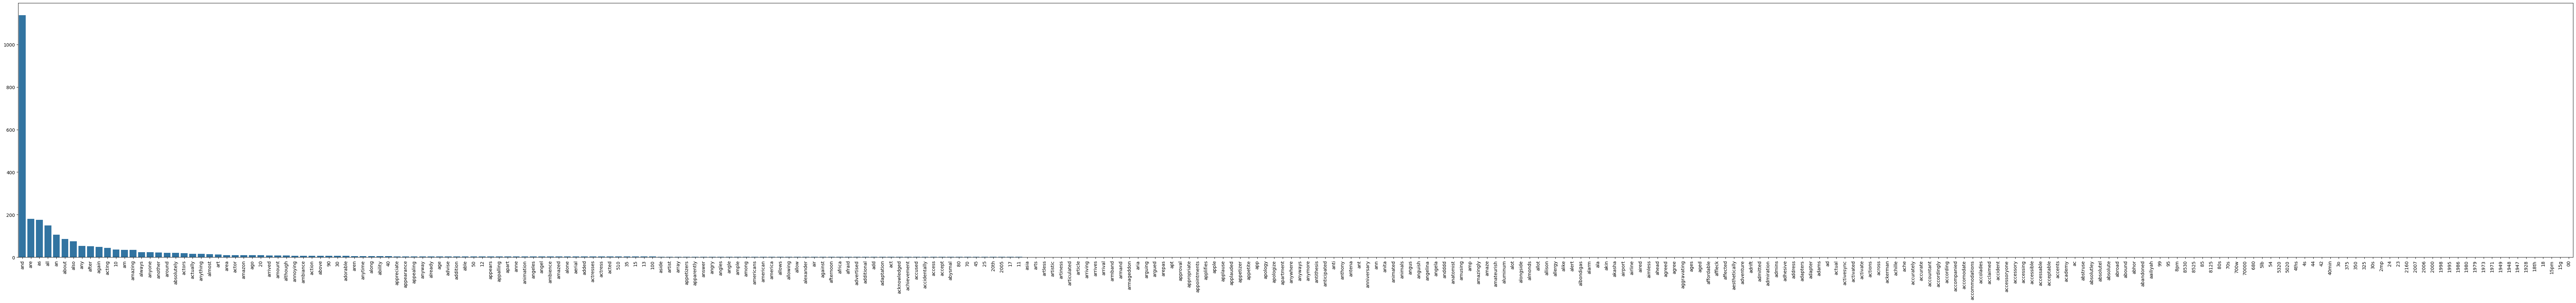

In [62]:
#create long tail
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term_name_300,y=term_frequencies_300)
g.set_xticks(term_name_300)
g.set_xticklabels(term_name_300, rotation = 90)

### Discretization and Binarization

In [63]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [64]:
mlb = preprocessing.LabelBinarizer()

In [65]:
mlb.fit(comment.website)

LabelBinarizer()

In [66]:
comment['bin_category'] = mlb.transform(comment['website']).tolist()

In [67]:
display(comment[0:1])
display(comment[1500:1501])
display(comment[2500:2501])

,sentences,score,source,website,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"


,sentences,score,source,website,unigrams,bin_category
1511,The cast is good.,1,imdb_labelled.txt,imdb,"[The, cast, is, good, .]","[0, 1, 0]"


,sentences,score,source,website,unigrams,bin_category
2513,Reasonably priced also!,1,yelp_labelled.txt,yelp,"[Reasonably, priced, also, !]","[0, 0, 1]"


### Data Exploration

In [68]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = comment.iloc[50]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = comment.iloc[1500]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = comment.iloc[2500]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

In [69]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['The cast is good.  ']
['Reasonably priced also!']


In [70]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Third Section

In [72]:
display(comment)

,sentences,score,source,website,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,amazon_cells,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled.txt,amazon_cells,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,amazon_cells,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled.txt,amazon_cells,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2996,Appetite instantly gone.,0,yelp_labelled.txt,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


In [73]:
comment['unigrams_without'] = comment['sentences'].apply(lambda x: dmh.tokenize_text_without_stopwords(x))
display(comment)

,sentences,score,source,website,unigrams,bin_category,unigrams_without
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",way plug US unless go converter .
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,amazon_cells,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]","Good case , Excellent value ."
2,Great for the jawbone.,1,amazon_cells_labelled.txt,amazon_cells,"[Great, for, the, jawbone, .]","[1, 0, 0]",Great jawbone .
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,amazon_cells,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",Tied charger conversations lasting 45 minutes...
4,The mic is great.,1,amazon_cells_labelled.txt,amazon_cells,"[The, mic, is, great, .]","[1, 0, 0]",mic great .
...,...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]",think food flavor texture lacking .
2996,Appetite instantly gone.,0,yelp_labelled.txt,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]",Appetite instantly gone .
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]",Overall impressed would go back .
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]","whole experience underwhelming , think 'll go..."


In [95]:
#separate different score comment
comment_0 = comment[comment['score'] == '0']
comment_1 = comment[comment['score'] == '1']
display(comment_0)

,sentences,score,source,website,unigrams,bin_category,unigrams_without
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,amazon_cells,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",way plug US unless go converter .
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,amazon_cells,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",Tied charger conversations lasting 45 minutes...
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled.txt,amazon_cells,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]",jiggle plug get line right get decent volume .
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled.txt,amazon_cells,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]","several dozen several hundred contacts , imag..."
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled.txt,amazon_cells,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]","Needless say , wasted money ."
...,...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]",think food flavor texture lacking .
2996,Appetite instantly gone.,0,yelp_labelled.txt,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]",Appetite instantly gone .
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]",Overall impressed would go back .
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt,yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]","whole experience underwhelming , think 'll go..."


In [97]:
#learn the vocabulary and return document-term matrix
count_vect = CountVectorizer() #delete stopwords
comment_counts_0 = count_vect.fit_transform(comment_0.unigrams_without)

#use sparse matrix to find the count of every term in comments
from collections import Counter 
from scipy.sparse import csr_matrix, find

negative = find(csr_matrix(comment_counts_0.toarray()))
term_0 = list(negative[1])

#use counter to find the 20 terms appear in positive and negative comments the most
counters_0 = Counter(term_0)
most_0 = counters_0.most_common(20)

plot_0 = []
count_0 = []
for i in most_0:
    plot_0.append(count_vect.get_feature_names_out()[i[0]])
    count_0.append(i[1])
print(plot_0)
print(count_0)

['movie', 'bad', 'phone', 'one', 'like', 'would', 'time', 'food', 'film', 'place', 'good', 'service', 'even', 'back', 'could', 'ever', 'really', 'work', 'worst', 'go']
[92, 87, 74, 66, 65, 64, 62, 61, 57, 54, 53, 53, 48, 47, 46, 46, 45, 38, 38, 35]


In [98]:
count_vect = CountVectorizer()
comment_counts_1 = count_vect.fit_transform(comment_1.unigrams_without)

positive = find(csr_matrix(comment_counts_1.toarray()))
term_1 = list(positive[1])
counters_1 = Counter(term_1)
most_1 = counters_1.most_common(20)

plot_1 = []
count_1 = []
for i in most_1:
    plot_1.append(count_vect.get_feature_names_out()[i[0]])
    count_1.append(i[1])
print(plot_1)
print(count_1)

['great', 'good', 'film', 'phone', 'movie', 'one', 'well', 'best', 'food', 'love', 'place', 'really', 'service', 'like', 'nice', 'time', 'excellent', 'works', 'also', 'quality']
[186, 166, 99, 81, 80, 71, 66, 61, 59, 55, 55, 55, 55, 52, 50, 50, 49, 46, 44, 38]


In [99]:
data = {
    'terms' : plot_0 + plot_1,
    'counts' : count_0 + count_1,
    'score' : ['negative' for i in range(20)] + ['positive' for i in range(20)]
}
df_sunbrust = pd.DataFrame(data = data)

In [100]:
#construct a figure displaying the 20 most appear terms in positive comments and negative comments
import plotly.express as px

fig = px.sunburst(df_sunbrust, path=['score', 'terms'], values='counts')
fig.show()

According to this figere, positive comments have many positive words, for exmples: 'great', 'good', 'best'.
However, it's not obvious that negative comments have any useful data.
Also, there are some terms not about the scores, it's about the things customers comment, like 'movie', film'.
Those terms will appear frequenly, but have no meaning about the scores.